# Hands on regression of <mark>top quark pT</mark> in tW events

## Some imports

In [1]:
import pandas as pd
import os
try:
    import uproot3 as uproot
except ImportError:
    import uproot

## Define a dictionary for process

In [2]:
process =[
    {'Class':'tW','path':['/scratch/tW//OutTree_1.root', 
                          '/scratch/tW//OutTree_16.root'],
     'xsecwt': 1,
     'selection':'EVENT_event>0'
    }
]

## Read data from root files as dataframe

In [3]:
import Tools.readData as readData

loadNew=False

if loadNew==True:
    df=readData.daskframe_from_rootfiles(process,"TNT/BOOM",branches=["Gen*",
                                                                      "Muon_pt","Muon_eta","Muon_phi",
                                                                      "Jet_pt","Jet_eta","Jet_phi",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags',
                                                                      'Met_type1PF_pt','Met_type1PF_sumEt'
                                                                      'EVENT_event'],flatten=False,debug=False)
    df.to_parquet('df.parquet.gzip',compression='gzip')
else:
    df=pd.read_parquet('df.parquet.gzip')
    

In [4]:
print(f'Total events read {len(df)}')

Total events read 212440


In [5]:
df.head()

,Gen_pt,Gen_eta,Gen_phi,Gen_p,Gen_energy,Gen_charge,Gen_vx,Gen_vy,Gen_vz,Gen_status,...,Met_xyCorrY,Met_type1PF_uncorrPx,Met_type1PF_uncorrPy,Met_type1PF_uncorrPt,Met_type1PF_uncorrPhi,Met_type1PF_shiftedPtUp,Met_type1PF_shiftedPtDown,EVENT_event,Class,xsecwt
0,"[0.0, 0.0, 0.0, 0.0, 26.742555618286133, 82.88...","[29256.0, -29256.0, 22786.3359375, -24395.5878...","[0.0, 0.0, 0.0, 0.0, 2.160212993621826, -2.290...","[6500.0, 6500.0, 30.3359375, 1639.587890625, 4...","[6500.000067719272, 6500.000067719272, 30.3359...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0,...","[0.0, 0.0, 0.10522079467773438, 0.105220794677...","[0.0, 0.0, 0.1687268167734146, 0.1687268167734...","[0.0, 0.0, -13.759533882141113, -13.7595338821...","[4.0, 4.0, 21.0, 21.0, 23.0, 22.0, 22.0, 41.0,...",...,-0.685861,-20.878354,-38.614645,43.897568,-2.066460,52.435719,49.454834,10653,tW,1
1,"[0.0, 0.0, 0.0, 0.0, 43.479156494140625, 41.18...","[29256.0, -29256.0, 22997.68359375, -22884.091...","[0.0, 0.0, 0.0, 0.0, 0.13389289379119873, -0.6...","[6500.0, 6500.0, 241.68359375, 128.091796875, ...","[6500.000067719272, 6500.000067719272, 241.683...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0,...","[0.0, 0.0, 0.10435939580202103, 0.104359395802...","[0.0, 0.0, 0.16953521966934204, 0.169535219669...","[0.0, 0.0, -0.9217044711112976, -0.92170447111...","[4.0, 4.0, 21.0, 21.0, 23.0, 22.0, 22.0, 42.0,...",...,-1.175968,-38.604541,28.169945,47.789711,2.511207,41.208508,43.899719,10645,tW,1
2,"[0.0, 0.0, 0.0, 0.0, 60.74887466430664, 270.22...","[29256.0, -29256.0, 23656.546875, -22896.58593...","[0.0, 0.0, 0.0, 0.0, -0.5050231218338013, 1.64...","[6500.0, 6500.0, 900.546875, 140.5859375, 65.1...","[6500.000067719272, 6500.000067719272, 900.546...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0,...","[0.0, 0.0, 0.10467060655355453, 0.104670606553...","[0.0, 0.0, 0.16912251710891724, 0.169122517108...","[0.0, 0.0, -5.6016340255737305, -5.60163402557...","[4.0, 4.0, 21.0, 21.0, 23.0, 22.0, 22.0, 41.0,...",...,-0.850891,-38.590693,123.467511,129.357910,1.873734,146.348312,141.209946,10647,tW,1
3,"[0.0, 0.0, 0.0, 0.0, 24.30813217163086, 70.529...","[29256.0, -29256.0, 23128.0703125, -22842.5078...","[0.0, 0.0, 0.0, 0.0, 0.06516370177268982, 2.84...","[6500.0, 6500.0, 372.0703125, 86.5078125, 124....","[6500.000067719272, 6500.000067719272, 372.070...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0,...","[0.0, 0.0, 0.10517765581607819, 0.105177655816...","[0.0, 0.0, 0.16616767644882202, 0.166167676448...","[0.0, 0.0, -3.8599727153778076, -3.85997271537...","[4.0, 4.0, 21.0, 21.0, 23.0, 22.0, 22.0, 41.0,...",...,-0.736927,40.451099,-42.437467,58.627895,-0.809358,73.711586,69.418488,10646,tW,1
4,"[0.0, 0.0, 0.0, 0.0, 56.3435173034668, 137.665...","[29256.0, -29256.0, 22933.185546875, -23353.98...","[0.0, 0.0, 0.0, 0.0, -1.403946876525879, -2.29...","[6500.0, 6500.0, 177.185546875, 597.984375, 35...","[6500.000067719272, 6500.000067719272, 177.185...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0,...","[0.0, 0.0, 0.10499045252799988, 0.104990452527...","[0.0, 0.0, 0.1677093505859375, 0.1677093505859...","[0.0, 0.0, 4.907552719116211, 4.90755271911621...","[4.0, 4.0, 21.0, 21.0, 23.0, 22.0, 22.0, 44.0,...",...,-1.057355,-29.239733,-88.317443,93.031891,-1.890513,91.811768,95.199142,10657,tW,1


## We need numpy


In [6]:
import numpy as np

## A custom function for binning

In [7]:
def MyBins(lower,upper,step): return np.arange(lower,upper+step,step).tolist()

In [8]:
Check=MyBins(0,10,1)
print(Check)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Define addtional variables that are not in the tree

In [9]:
df['NMuons'] = df['Muon_pt'].str.len()
df['NJets'] = df['Jet_pt'].str.len()


## Plotting NMuons and Njets

<AxesSubplot:>

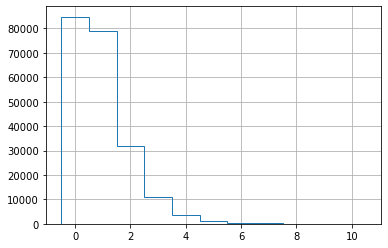

In [10]:
df['NMuons'].hist(bins=MyBins(-0.5,10.5,1),histtype='step')

<AxesSubplot:>

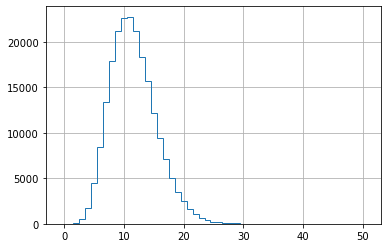

In [11]:
df['NJets'].hist(bins=MyBins(-0.5,50.5,1),histtype='step')

## How to split branches ??

Example: *Gen_pdg_id* branch of variable length

If we want to query first, second or last element, we can first split it! 


In [12]:
dfk = pd.DataFrame([pd.Series(x) for x in df.Gen_pdg_id])
dfk.columns = ['Gen_pdg_id{}'.format(x+1) for x in dfk.columns]
dfk.head()

,Gen_pdg_id1,Gen_pdg_id2,Gen_pdg_id3,Gen_pdg_id4,Gen_pdg_id5,Gen_pdg_id6,Gen_pdg_id7,Gen_pdg_id8,Gen_pdg_id9,Gen_pdg_id10,...,Gen_pdg_id258,Gen_pdg_id259,Gen_pdg_id260,Gen_pdg_id261,Gen_pdg_id262,Gen_pdg_id263,Gen_pdg_id264,Gen_pdg_id265,Gen_pdg_id266,Gen_pdg_id267
0,2212.0,2212.0,21.0,21.0,-5.0,6.0,-24.0,-4.0,-5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2212.0,2212.0,21.0,5.0,21.0,6.0,-24.0,5.0,6.0,-24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2212.0,2212.0,5.0,21.0,21.0,6.0,-24.0,5.0,6.0,-24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2212.0,2212.0,21.0,5.0,21.0,6.0,-24.0,5.0,6.0,-24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2212.0,2212.0,21.0,21.0,-5.0,6.0,-24.0,-5.0,6.0,-24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## I am going to start modifyig the data-frame, so just preserving copy

In [13]:
dfh=df.copy()

## A basic selection

### one muon with Muon_pt > 26. && abs(Muon_eta < 2.1) 

### three jets with Jet_pt > 30. && abs(Jet_eta < 2.4)
#### one of which passes Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags > 0.627

In [14]:
df["MuonBit"]=0
df["JetBit"]=0
df["allpass"]=0

for ind, event in df.iterrows():
        
    for Muonpt, Muoneta in zip(event.Muon_pt,event.Muon_eta):
        if (Muonpt>26) and (abs(Muoneta)<2.1):
            df.loc[ind,'MuonBit']=1
            break
        
    jetpassed=0
    jetpfpassed=0
    for Jetpt, Jeteta,JetpfCombined in zip(event.Jet_pt,event.Jet_eta,
                                           event.Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags):
        
        if (Jetpt>30) and (abs(Jeteta)<2.4):
            jetpassed=jetpassed+1
            
            if JetpfCombined>0.627:
                jetpfpassed=jetpfpassed+1
            if jetpassed>2 and jetpfpassed>0:
                df.loc[ind,'JetBit']=1
                break
                
    if (df.loc[ind,'MuonBit']==1) and (df.loc[ind,'JetBit']==1):
        df.loc[ind,'allpass']=1
        continue 

In [15]:
print(f'Total events selected {len(df.query("allpass==1"))}')

Total events selected 42191


In [16]:
df.query("allpass==1",inplace=True) ## df is now modified
print(f'Total events selected {len(df)}')

Total events selected 42191


## Need matplotlib for plotting

In [17]:
import matplotlib.pyplot as plt     

<AxesSubplot:>

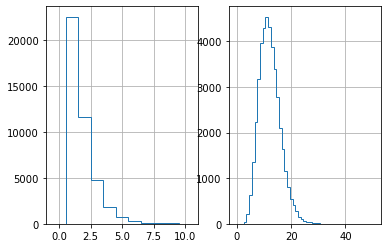

In [18]:
fig,ax=plt.subplots(1,2)
df['NMuons'].hist(bins=MyBins(-0.5,10.5,1),histtype='step',ax=ax[0])
df['NJets'].hist(bins=MyBins(-0.5,50.5,1),histtype='step',ax=ax[1])

## A function to split a variable length branch

In [19]:
def split(var,df):
    df['k']=1
    dfM = pd.DataFrame([pd.Series(x) for x in df[var]])
    dfM.columns = [f'{var}{format(x)}' for x in dfM.columns]
    df=pd.concat([df.reset_index(drop=True), dfM.reset_index(drop=True)], axis=1)
    return df

## Splitting Muon_pt

In [20]:
df=split('Muon_pt',df)

In [21]:
df['Muon_pt0']

0         60.909378
1         56.492050
2         46.167675
3        158.422348
4        102.181343
            ...    
42186    164.694336
42187     50.735451
42188    118.503510
42189     27.775686
42190     42.580822
Name: Muon_pt0, Length: 42191, dtype: float64

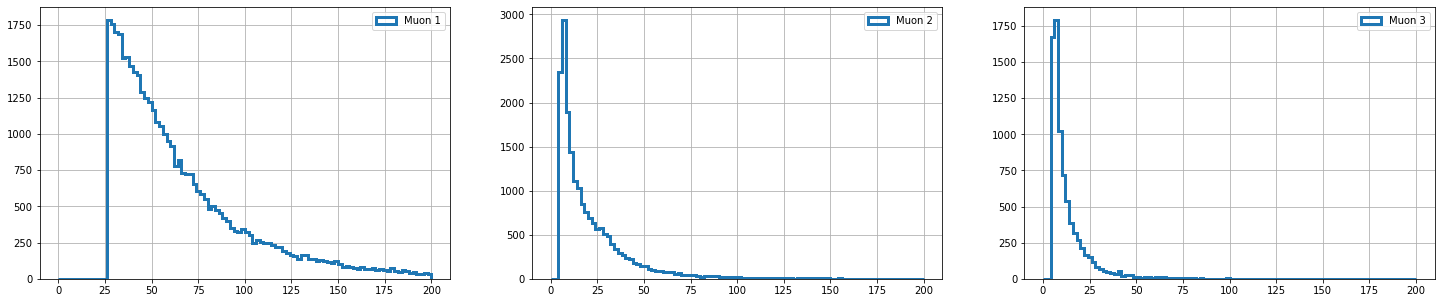

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
for i in [0,1,2]:
    df['Muon_pt'+str(i)].hist(bins=MyBins(0,200,2),ax=axes[i],histtype='step',lw=3,label=f'Muon {i+1}')
    axes[i].legend()

## Printing all the Gen branches

In [23]:
for col in df.columns:
    if 'Gen' in col:
        print(col)

Gen_pt
Gen_eta
Gen_phi
Gen_p
Gen_energy
Gen_charge
Gen_vx
Gen_vy
Gen_vz
Gen_status
Gen_pdg_id
Gen_motherpdg_id
Gen_numDaught
Gen_numMother
Gen_BmotherIndex
Gen_BmotherIndices
Gen_BdaughtIndices
Gen_type1PF_Met
Gen_type1PF_Metpx
Gen_type1PF_Metpy
Gen_type1PF_Metpz
Gen_type1PF_Meteta
Gen_type1PF_Metphi
Gen_type1PF_Meten


## Count the number of gen particles in the record 

In [24]:
df['NGen'] = df['Gen_pt'].str.len()

<AxesSubplot:>

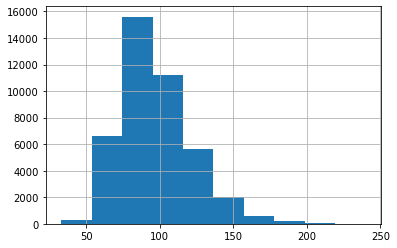

In [25]:
df['NGen'].hist()

## Finding the gen top and storing it's pt and eta

In [26]:
####Finding the gen Top in tW
df['GenToppt']=-999
df['GenTopeta']=-999

for ind, row in df.iterrows():
    for partind, part in enumerate(row.Gen_pdg_id):
        if abs(row.Gen_pdg_id[partind])==6 and row.Gen_numDaught[partind]==2:
            #print(f'Found top at {partind} with pT {row.Gen_pt[partind]} GeV and mother ID {row.Gen_motherpdg_id[partind]} with {row.Gen_numDaught[partind]} daughters')
            df.loc[ind,'GenToppt'] = row.Gen_pt[partind]
            df.loc[ind,'GenTopeta'] = row.Gen_eta[partind] 
            
 

<AxesSubplot:>

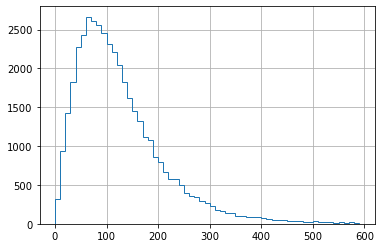

In [27]:
df['GenToppt'].hist(bins=[i for i in range(0,600,10)],ls='-',histtype='step')

<AxesSubplot:>

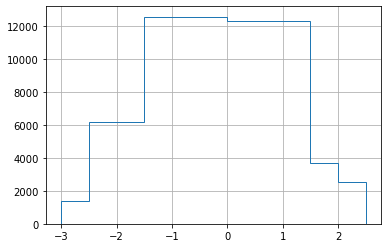

In [28]:
df['GenTopeta'].hist(bins=[-3.0,-2.5,-1.5,0,1.5,2.0,2.5],ls='-',histtype='step')

## Regression

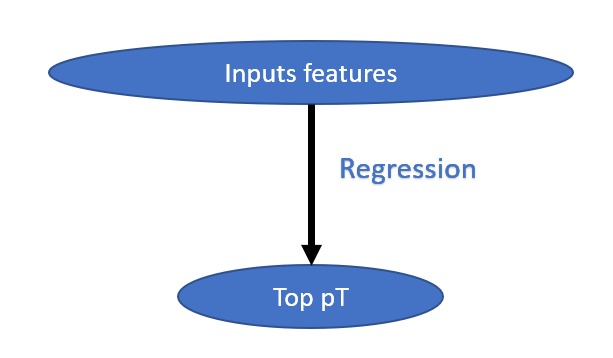

## Pre-processing for the regression

In [29]:
df=split('Jet_pt',df)
df=split('Muon_eta',df)
df=split('Muon_phi',df)
df=split('Jet_eta',df)
df=split('Jet_phi',df)


## Preparing the regression data frame

In [30]:
dfr=df[["Muon_pt0","Muon_eta0","Muon_phi0",
        "Jet_pt0","Jet_eta0","Jet_phi0",
        "Jet_pt1","Jet_eta1","Jet_phi1",
        "Jet_pt2","Jet_eta2","Jet_phi2",
        'GenToppt']]

In [31]:
dfr.head()

,Muon_pt0,Muon_eta0,Muon_phi0,Jet_pt0,Jet_eta0,Jet_phi0,Jet_pt1,Jet_eta1,Jet_phi1,Jet_pt2,Jet_eta2,Jet_phi2,GenToppt
0,60.909378,0.756116,-2.225853,66.413002,0.372311,0.277309,63.531914,0.755193,-2.224941,38.463036,-0.411286,0.109514,54.442272
1,56.492050,0.659582,1.840974,167.610062,1.001974,-1.711470,60.285843,0.657585,1.837036,48.240726,-0.286107,-0.428892,271.609070
2,46.167675,0.139499,2.104469,103.817795,0.713723,-0.766980,70.983833,0.499549,-3.098937,49.509895,0.140766,2.107204,81.531662
3,158.422348,1.856111,-1.290064,183.716248,1.854433,-1.291151,127.982094,0.411666,2.106622,64.024826,1.074814,1.372956,145.980896
4,102.181343,-1.689755,-1.773635,124.617867,-1.679708,-1.779317,117.852951,-0.591841,2.399061,45.485611,-0.321394,0.702558,123.150360


## Split the dataframe into training and testing

In [32]:
index = dfr.index

from sklearn.model_selection import train_test_split

TrainIndices=[]
TestIndices=[]
TrainIndices, TestIndices = train_test_split(index.values.tolist(), test_size=0.2, random_state=42, shuffle=True)

In [33]:
dfr.loc[TrainIndices,'Dataset'] = "Train"
dfr.loc[TestIndices,'Dataset'] = "Test"

dfr.loc[TrainIndices,'TrainDataset'] = 1
dfr.loc[TestIndices,'TrainDataset'] = 0

/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
X_train=dfr.loc[TrainIndices,["Muon_pt0","Muon_eta0","Muon_phi0","Jet_pt0","Jet_eta0","Jet_phi0","Jet_pt1","Jet_eta1","Jet_phi1","Jet_pt2","Jet_eta2","Jet_phi2"]]
X_test=dfr.loc[TestIndices,["Muon_pt0","Muon_eta0","Muon_phi0","Jet_pt0","Jet_eta0","Jet_phi0","Jet_pt1","Jet_eta1","Jet_phi1","Jet_pt2","Jet_eta2","Jet_phi2"]]
Y_train=dfr.loc[TrainIndices,'GenToppt']
Y_test=dfr.loc[TestIndices,'GenToppt']

print(X_train.shape)

(33752, 12)


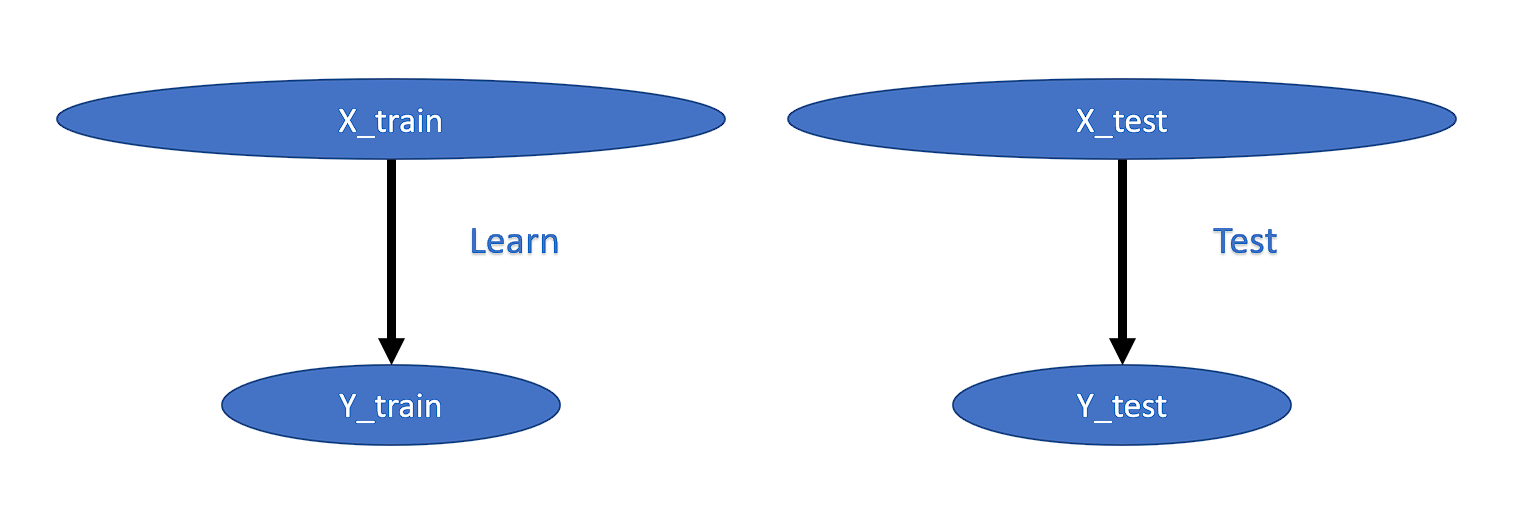

## We will first use xgboost for regression

In [35]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, Y_train)

[18:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Running pediction

In [36]:
Y_train_pred=model.predict(X_train)

Y_test_pred=model.predict(X_test)

## Storing the prediction is the dataframe

In [37]:
dfr['PredToppt']=0
dfr.loc[TrainIndices,'PredToppt']=model.predict(X_train)
dfr.loc[TestIndices,'PredToppt']=model.predict(X_test)

<ipython-input-37-7df034c2fb7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['PredToppt']=0
/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Plotting predicted Top pT for training and testing dataset

<AxesSubplot:>

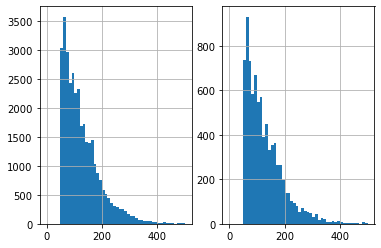

In [38]:
fig,ax=plt.subplots(1,2)
dfr.loc[TrainIndices,'PredToppt'].hist(ax=ax[0],bins=MyBins(0,500,10))
dfr.loc[TestIndices,'PredToppt'].hist(ax=ax[1],bins=MyBins(0,500,10))

## Comparing prediction with ground truth

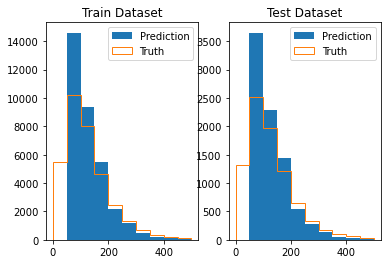

In [39]:
fig,ax=plt.subplots(1,2)
dfr.loc[TrainIndices,'PredToppt'].hist(ax=ax[0],bins=MyBins(0,500,50),label='Prediction')
dfr.loc[TrainIndices,'GenToppt'].hist(ax=ax[0],bins=MyBins(0,500,50),histtype='step',label='Truth')
ax[0].set_title("Train Dataset")
ax[0].legend()
ax[0].grid(False)

dfr.loc[TestIndices,'PredToppt'].hist(ax=ax[1],bins=MyBins(0,500,50),label='Prediction')
dfr.loc[TestIndices,'GenToppt'].hist(ax=ax[1],bins=MyBins(0,500,50),histtype='step',label='Truth')
ax[1].set_title("Test Dataset")
ax[1].legend()
ax[1].grid(False)

## Trying increasing the input features

In [40]:
df=split('Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags',df)

In [41]:
dfr=df[["Muon_pt0","Muon_eta0","Muon_phi0",
        "Jet_pt0","Jet_eta0","Jet_phi0",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags0',
        "Jet_pt1","Jet_eta1","Jet_phi1",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags1',
        "Jet_pt2","Jet_eta2","Jet_phi2",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags2',
        'Met_type1PF_pt','Met_type1PF_sumEt','NMuons','NJets','GenToppt']]
len(df)

42191

## Runing the full chain again

In [42]:
index = dfr.index
from sklearn.model_selection import train_test_split

TrainIndices=[]
TestIndices=[]
TrainIndices, TestIndices = train_test_split(index.values.tolist(), test_size=0.2, random_state=42, shuffle=True)
dfr.loc[TrainIndices,'Dataset'] = "Train"
dfr.loc[TestIndices,'Dataset'] = "Test"

dfr.loc[TrainIndices,'TrainDataset'] = 1
dfr.loc[TestIndices,'TrainDataset'] = 0

model = XGBRegressor(objective='reg:squarederror')

X_train=dfr.loc[TrainIndices,["Muon_pt0","Muon_eta0","Muon_phi0",
                              "Jet_pt0","Jet_eta0","Jet_phi0",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags0',
                              "Jet_pt1","Jet_eta1","Jet_phi1",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags1',
                              "Jet_pt2","Jet_eta2","Jet_phi2",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags2',
                              'Met_type1PF_pt','Met_type1PF_sumEt','NMuons','NJets']]
X_test=dfr.loc[TestIndices,["Muon_pt0","Muon_eta0","Muon_phi0",
                              "Jet_pt0","Jet_eta0","Jet_phi0",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags0',
                              "Jet_pt1","Jet_eta1","Jet_phi1",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags1',
                              "Jet_pt2","Jet_eta2","Jet_phi2",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags2',
                              'Met_type1PF_pt','Met_type1PF_sumEt','NMuons','NJets']]
Y_train=dfr.loc[TrainIndices,'GenToppt']
Y_test=dfr.loc[TestIndices,'GenToppt']

print(X_train.shape)

model.fit(X_train, Y_train)
dfr['PredToppt']=0
dfr.loc[TrainIndices,'PredToppt']=model.predict(X_train)
dfr.loc[TestIndices,'PredToppt']=model.predict(X_test)

/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


(33752, 19)


<ipython-input-42-7e1b83d45187>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['PredToppt']=0
/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


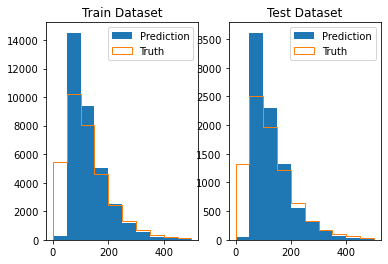

In [43]:
fig,ax=plt.subplots(1,2)
dfr.loc[TrainIndices,'PredToppt'].hist(ax=ax[0],bins=MyBins(0,500,50),label='Prediction')
dfr.loc[TrainIndices,'GenToppt'].hist(ax=ax[0],bins=MyBins(0,500,50),histtype='step',label='Truth')
ax[0].set_title("Train Dataset")
ax[0].legend()
ax[0].grid(False)

dfr.loc[TestIndices,'PredToppt'].hist(ax=ax[1],bins=MyBins(0,500,50),label='Prediction')
dfr.loc[TestIndices,'GenToppt'].hist(ax=ax[1],bins=MyBins(0,500,50),histtype='step',label='Truth')
ax[1].set_title("Test Dataset")
ax[1].legend()
ax[1].grid(False)

## Trying a DNN now

In [44]:
dfk=df[["Muon_pt0","Muon_eta0","Muon_phi0",
        "Jet_pt0","Jet_eta0","Jet_phi0",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags0',
        "Jet_pt1","Jet_eta1","Jet_phi1",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags1',
        "Jet_pt2","Jet_eta2","Jet_phi2",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags2',
        'Met_type1PF_pt','Met_type1PF_sumEt','NMuons','NJets','GenToppt']]

## Creating the training and testing dataset

In [45]:
index = dfk.index
from sklearn.model_selection import train_test_split

TrainIndices=[]
TestIndices=[]
TrainIndices, TestIndices = train_test_split(index.values.tolist(), test_size=0.2, random_state=42, shuffle=True)
dfk.loc[TrainIndices,'Dataset'] = "Train"
dfk.loc[TestIndices,'Dataset'] = "Test"

dfk.loc[TrainIndices,'TrainDataset'] = 1
dfk.loc[TestIndices,'TrainDataset'] = 0

X_train=dfk.loc[TrainIndices,["Muon_pt0","Muon_eta0","Muon_phi0",
                              "Jet_pt0","Jet_eta0","Jet_phi0",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags0',
                              "Jet_pt1","Jet_eta1","Jet_phi1",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags1',
                              "Jet_pt2","Jet_eta2","Jet_phi2",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags2',
                              'Met_type1PF_pt','Met_type1PF_sumEt','NMuons','NJets']]
X_test=dfk.loc[TestIndices,["Muon_pt0","Muon_eta0","Muon_phi0",
                              "Jet_pt0","Jet_eta0","Jet_phi0",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags0',
                              "Jet_pt1","Jet_eta1","Jet_phi1",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags1',
                              "Jet_pt2","Jet_eta2","Jet_phi2",'Jet_pfCombinedInclusiveSecondaryVertexV2BJetTags2',
                              'Met_type1PF_pt','Met_type1PF_sumEt','NMuons','NJets']]
Y_train=dfk.loc[TrainIndices,'GenToppt']
Y_test=dfk.loc[TestIndices,'GenToppt']

print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(33752, 19)
(8439, 19)
(33752,)
(8439,)


/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Preparation for DNN

In [46]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

## DNN structure

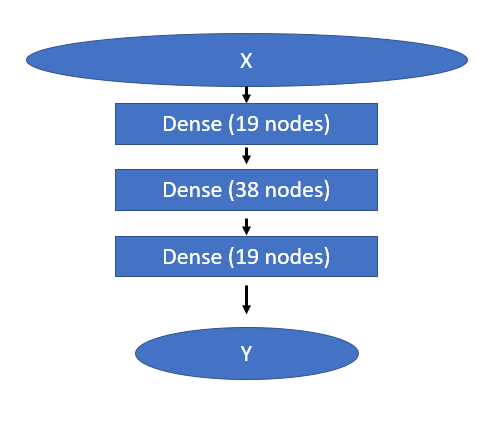

In [47]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
    model.add(Dense(38, kernel_initializer='normal',activation='relu'))
    model.add(Dense(19, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_absolute_percentage_error', optimizer=Adam(lr=0.0001))
    return model

In [48]:
modelDNN=baseline_model()

## Starting the training 

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history=modelDNN.fit(X_train,Y_train,epochs=100,batch_size=100,validation_data=(X_test, Y_test),callbacks=[es])

Epoch 1/100
338/338 [==============================] - 3s 6ms/step - loss: 97.1988 - val_loss: 65.5311
Epoch 2/100
338/338 [==============================] - 1s 4ms/step - loss: 62.0052 - val_loss: 63.1955
Epoch 3/100
338/338 [==============================] - 1s 4ms/step - loss: 60.8026 - val_loss: 62.3614
Epoch 4/100
338/338 [==============================] - 1s 4ms/step - loss: 60.6942 - val_loss: 61.4427
Epoch 5/100
338/338 [==============================] - 1s 4ms/step - loss: 59.4483 - val_loss: 60.3282
Epoch 6/100
338/338 [==============================] - 1s 4ms/step - loss: 58.0801 - val_loss: 59.0047
Epoch 7/100
338/338 [==============================] - 1s 4ms/step - loss: 56.8298 - val_loss: 57.6984
Epoch 8/100
338/338 [==============================] - 1s 4ms/step - loss: 56.8447 - val_loss: 56.6882
Epoch 9/100
338/338 [==============================] - 1s 4ms/step - loss: 55.1536 - val_loss: 56.1056
Epoch 10/100
338/338 [==============================] - 1s 4ms/step - los

Epoch 80/100
338/338 [==============================] - 1s 4ms/step - loss: 51.4902 - val_loss: 54.2523
Epoch 81/100
338/338 [==============================] - 1s 3ms/step - loss: 52.1193 - val_loss: 53.7854
Epoch 82/100
338/338 [==============================] - 1s 4ms/step - loss: 53.7756 - val_loss: 53.6819
Epoch 83/100
338/338 [==============================] - 1s 4ms/step - loss: 52.4504 - val_loss: 53.6823
Epoch 84/100
338/338 [==============================] - 1s 4ms/step - loss: 52.4626 - val_loss: 53.6284
Epoch 85/100
338/338 [==============================] - 1s 4ms/step - loss: 51.8220 - val_loss: 53.6345
Epoch 86/100
338/338 [==============================] - 2s 5ms/step - loss: 53.1649 - val_loss: 53.6175
Epoch 87/100
338/338 [==============================] - 1s 4ms/step - loss: 53.0898 - val_loss: 53.6704
Epoch 88/100
338/338 [==============================] - 1s 4ms/step - loss: 52.6734 - val_loss: 53.6020
Epoch 89/100
338/338 [==============================] - 1s 4ms/s

## Loss plot

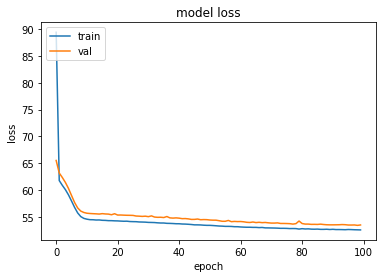

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Storing both the XGBoost and DNN output in the dataframe

In [51]:
dfk['DNNPredToppt']=0
dfk.loc[TrainIndices,'DNNPredToppt']=modelDNN.predict(X_train)
dfk.loc[TestIndices,'DNNPredToppt']=modelDNN.predict(X_test)

dfk.loc[TrainIndices,'XGBPredToppt']=model.predict(X_train)
dfk.loc[TestIndices,'XGBPredToppt']=model.predict(X_test)

<ipython-input-51-55815f6fff1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfk['DNNPredToppt']=0
/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

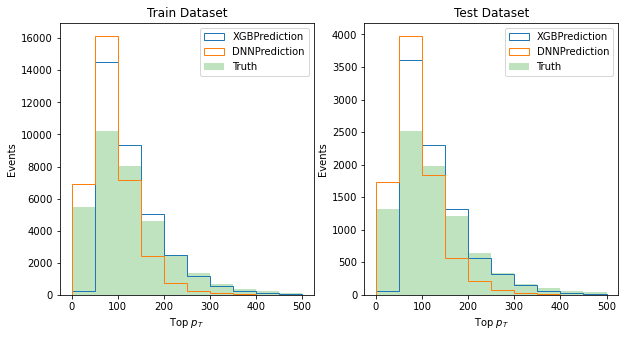

In [52]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
dfr.loc[TrainIndices,'PredToppt'].hist(ax=ax[0],bins=MyBins(0,500,50),label='XGBPrediction',histtype='step')
dfk.loc[TrainIndices,'DNNPredToppt'].hist(ax=ax[0],bins=MyBins(0,500,50),label='DNNPrediction',histtype='step')
dfk.loc[TrainIndices,'GenToppt'].hist(ax=ax[0],bins=MyBins(0,500,50),label='Truth',alpha=0.3)
ax[0].set_title("Train Dataset")
ax[0].set_ylabel("Events")
ax[0].set_xlabel("Top $p_T$")
ax[0].legend()
ax[0].grid(False)

dfr.loc[TestIndices,'PredToppt'].hist(ax=ax[1],bins=MyBins(0,500,50),label='XGBPrediction',histtype='step')
dfk.loc[TestIndices,'DNNPredToppt'].hist(ax=ax[1],bins=MyBins(0,500,50),label='DNNPrediction',histtype='step')
dfk.loc[TestIndices,'GenToppt'].hist(ax=ax[1],bins=MyBins(0,500,50),label='Truth',alpha=0.3)
ax[1].set_title("Test Dataset")
ax[1].set_ylabel("Events")
ax[1].set_xlabel("Top $p_T$")
ax[1].legend()
ax[1].grid(False)